In [15]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install beautifulsoup4
!pip install html5lib


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64                                          Using cache
pkgs/main/n

In [16]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [32]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [19]:
tesla = yf.Ticker("TSLA")

In [20]:
tesla_data = tesla.history(period = "max")

In [46]:
#tesla_data.drop("level_0" , axis=1 , inplace=True)
tesla_data.reset_index(inplace = True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.



In [63]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

tesla_revenue_data = pd.read_html(url)
tesla_quarter = tesla_revenue_data[1]
tesla_quarter.rename(columns={"Tesla Quarterly Revenue(Millions of US $)" : "Date" , "Tesla Quarterly Revenue(Millions of US $).1" : "Revenue"} , inplace=True)
tesla_yearly = tesla_revenue_data[0]
tesla_yearly.rename(columns={"Tesla Annual Revenue(Millions of US $)" : "Date" , "Tesla Annual Revenue(Millions of US $).1" : "Revenue"},inplace=True)

tesla_revenue = pd.concat([tesla_yearly,tesla_quarter]).reset_index(drop=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"") 
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]


tesla_revenue['Date'] = tesla_revenue['Date'].astype("string")
tesla_revenue.sort_values(by="Date" , inplace=True)

tesla_revenue.tail()

,Date,Revenue
17,2021-09-30,13757
16,2021-12-31,17719
15,2022-03-31,18756
14,2022-06-30,16934
13,2022-09-30,21454


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [23]:
gme = yf.Ticker("GME")

In [24]:
gme_data = gme.history(period = "max")

In [25]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [64]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

gme_revenue_data = pd.read_html(url)
gme_quarter = gme_revenue_data[1]
gme_quarter.rename(columns={"GameStop Quarterly Revenue(Millions of US $)" : "Date" , "GameStop Quarterly Revenue(Millions of US $).1" : "Revenue"} , inplace=True)
gme_yearly = gme_revenue_data[0]
gme_yearly.rename(columns={"GameStop Annual Revenue(Millions of US $)" : "Date" , "GameStop Annual Revenue(Millions of US $).1" : "Revenue"},inplace=True)

gme_revenue = pd.concat([gme_yearly,gme_quarter]).reset_index(drop=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"") 
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue['Date'] = gme_revenue['Date'].astype("string")
gme_revenue.sort_values(by="Date" , inplace=True)

gme_revenue.tail()

,Date,Revenue
19,2019-07-31,1286
18,2019-10-31,1439
0,2020,6466
17,2020-01-31,2194
16,2020-04-30,1021


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

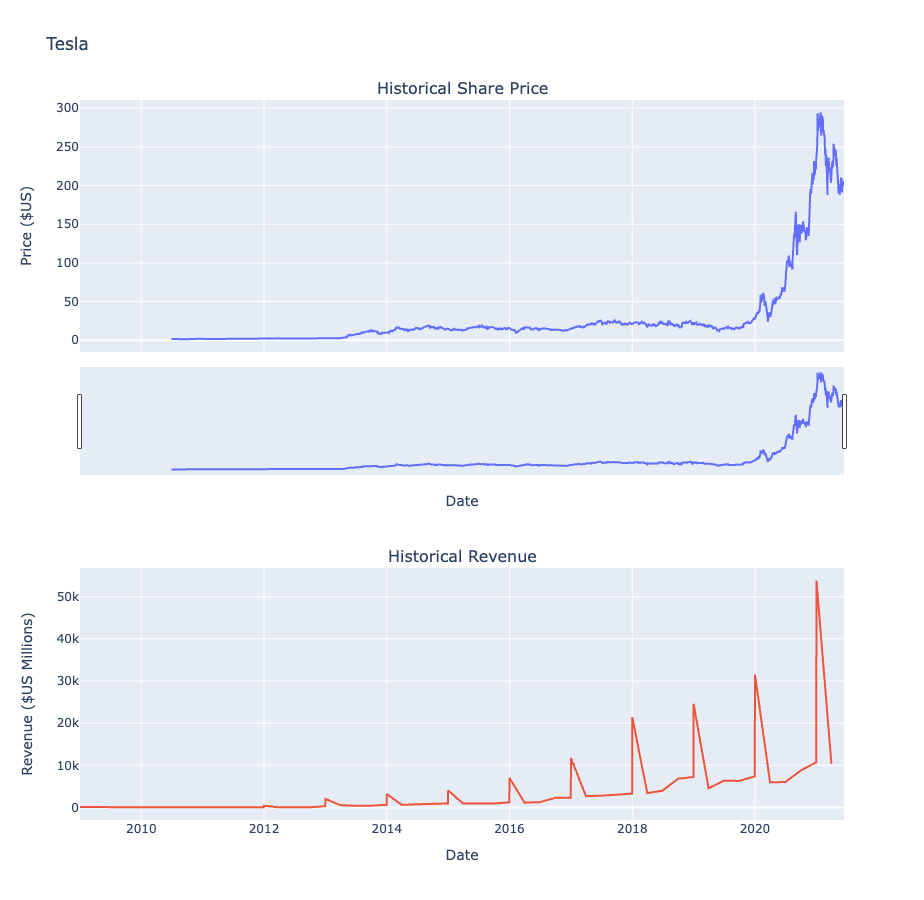

In [65]:
tesla_stock_graph = make_graph(tesla_data , tesla_revenue , 'Tesla')
tesla_stock_graph

Question 5: Plot Game Stop Stock Graph

Use the make_graph function to graph the Game Stop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

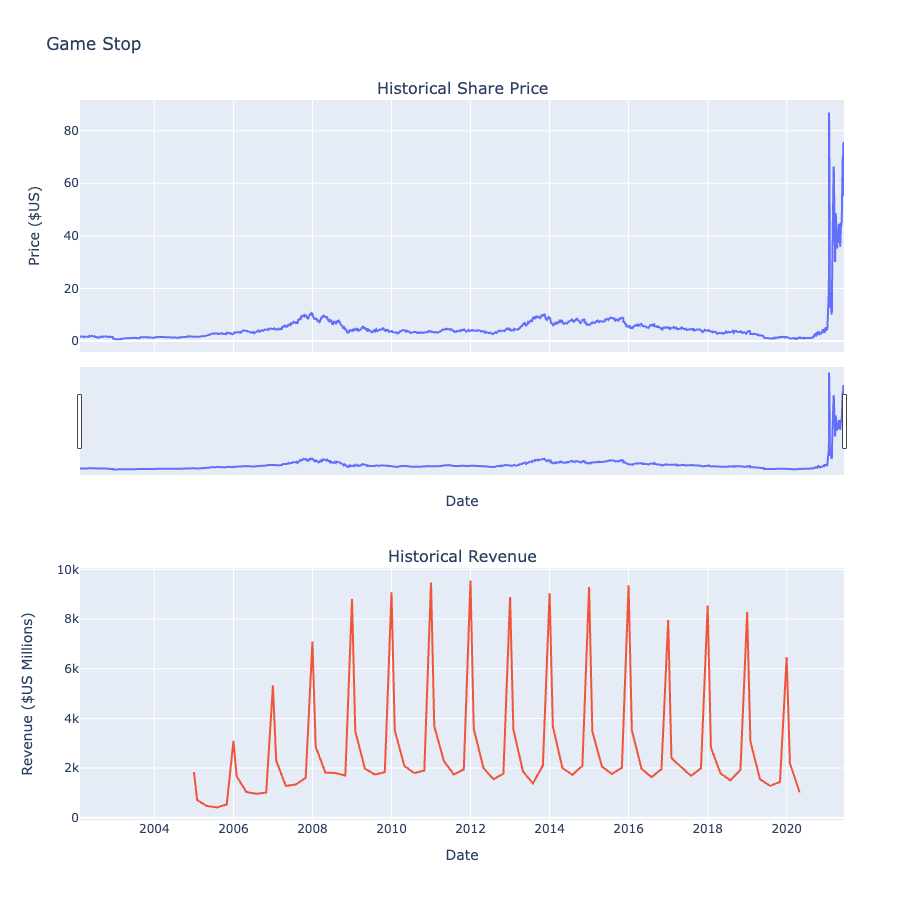

In [66]:
gme_stock_graph = make_graph(gme_data , gme_revenue , 'Game Stop')
gme_stock_graph